<a href="https://colab.research.google.com/github/FAlgeri/SDA2---project/blob/main/project2/Filippo_Algeri_K_14634.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SDA2 Project 2**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

#### **1. Derive the formulas for P(C = T | R = T, S = T,W = T), P(C = T | R = F S = T,W = T), P(R = T | C = T, S = T,W = T) and P(R = T | C = F, S = T,W = T) up to normalization constants in the denominators, and compute their values by renormalizing the two possible values for each conditional probability distribution. (2 point)**


#### **2. Implement the Gibbs sampler sketched above for the Bayesian network in Figure 1 and draw 100 samples from the joint probability distribution P(R,C | S = T,W = T) (4 point)**



In [98]:
def gibbs_sampler(num_sample):

  samples = {'cloudy': [],
            'rain': [], 
            'sprinkler': [], 
            'wet': []}

  # Conditional probability tables for each node
  conditional_probability = {'cloudy': np.array([0.5, 0.5]), 
                            'rain': np.array([[0.8, 0.2], [0.2, 0.8]]),  
                            'sprinkler': np.array([[0.5, 0.5], [0.9, 0.1]]), 
                            'wet': np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])}

  # Initialize the nodes
  cloudy = np.random.choice([0, 1], p=conditional_probability['cloudy'])
  rain = np.random.choice([0, 1], p=conditional_probability['rain'][cloudy])
  sprinkler = np.random.choice([0, 1], p=conditional_probability['sprinkler'][cloudy])
  wet = np.random.choice([0, 1], p=conditional_probability['wet'][sprinkler][rain])

  # Loop
  for _ in range(num_sample):
    cloudy = np.random.choice([0, 1], p=conditional_probability['cloudy'])
    rain = np.random.choice([0, 1], p=conditional_probability['rain'][cloudy])
    sprinkler = np.random.choice([0, 1], p=conditional_probability['sprinkler'][cloudy])
    wet = np.random.choice([0, 1], p=conditional_probability['wet'][sprinkler][rain])
    samples['cloudy'].append(cloudy)
    samples['rain'].append(rain)
    samples['sprinkler'].append(sprinkler)
    samples['wet'].append(wet)
  
  return samples

In [99]:
samples = gibbs_sampler(100)

#### **3. Estimate the marginal probability of rain, given that the sprinkler is on and the grass is wet P(R = T | S = T,W = T) from the 100 samples. (2 point)**

In [100]:
id = []
for i in range(100):
  if samples['sprinkler'][i] == 1 and samples['wet'][i] == 1:
    id.append(i)

In [101]:
count = 0
for i in id:
  if samples['rain'][i] == 1:
    count += 1
marginal_probability = count/len(id)
print(marginal_probability)

0.3157894736842105


#### **4. Now draw 50,000 samples instead of 100 using the Gibbs sampler.**


In [263]:
samples1 = gibbs_sampler(50000)

#### **5. Provide the plot of the relative frequencies of R = T and C = T up to each iteration t against t, for two independent runs of the sampler. Suggest a burn-in time based on this plot. (1 point)**


In [264]:
samples2 = gibbs_sampler(50000)

In [274]:
run1 = []
for _ in range(10000, len(samples1['rain'])):
  if samples1['rain'][_] == 1:
    run1.append('R = T')
for _ in range(10000, len(samples1['cloudy'])):
  if samples1['cloudy'][_] == 1:
    run1.append('C = T')

In [275]:
run2 = []
for _ in range(10000, len(samples2['rain'])):
  if samples2['rain'][_] == 1:
    run2.append('R = T')
for _ in range(10000, len(samples2['cloudy'])):
  if samples2['cloudy'][_] == 1:
    run2.append('C = T')

Text(0, 0.5, '')

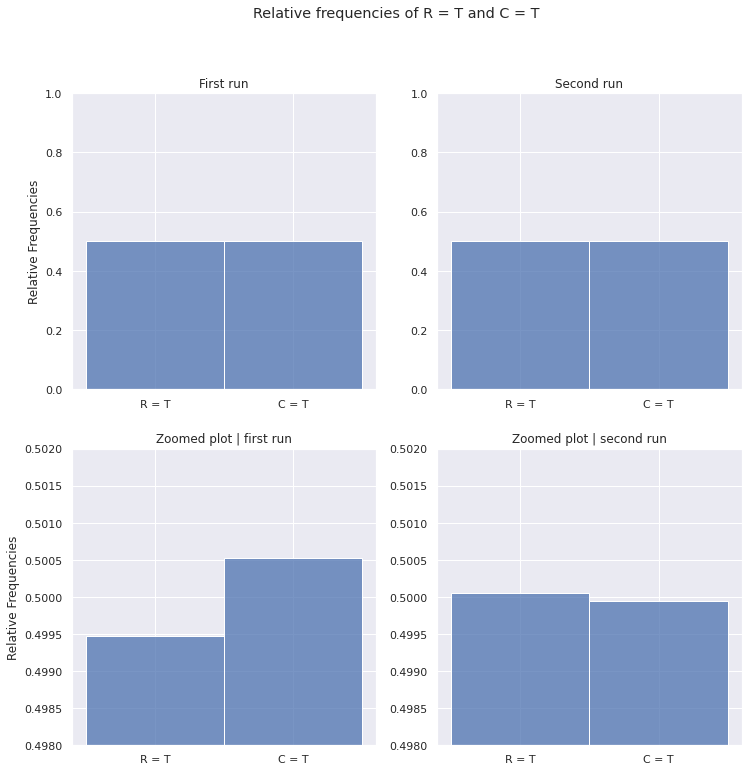

In [325]:
sns.set_theme()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Relative frequencies of R = T and C = T')

sns.histplot(run1, stat='proportion', ax=axs[0][0])
axs[0][0].set_title('First run')
axs[0][0].set_ylim(0,1)
axs[0][0].set_ylabel("Relative Frequencies") 

sns.histplot(run2, stat='proportion', ax=axs[0][1])
axs[0][1].set_title('Second run')
axs[0][1].set_ylim(0,1)
axs[0][1].set_ylabel("")

sns.histplot(run1, stat='proportion', ax=axs[1][0])
axs[1][0].set_title('Zoomed plot | first run')
axs[1][0].set_ylim(0.498,0.502)
axs[1][0].set_ylabel("Relative Frequencies")

sns.histplot(run2, stat='proportion', ax=axs[1][1])
axs[1][1].set_title('Zoomed plot | second run')
axs[1][1].set_ylim(0.498,0.502)
axs[1][1].set_ylabel("")

#### **6. Investigate the auto-correlation among the samples. We expect adjacent members from a Gibbs sampling sequence to be positively correlated, and we can quantify the amount of this correlation by using the auto-correlation function. The lag-k auto-correlation ρk is the correlation between every draw and its kth neighbouring samples. Provide plots for both variables Rain and Cloudy. Suggest an interval for drawing approximately independent samples. (2 points)**


In [107]:
def acf(x, length=100):
    return np.array([np.corrcoef(x[:-i], x[i:])[0, 1]  \
        for i in range(1, length)])

In [108]:
r = acf(samples2['rain'])
c = acf(samples2['cloudy'])
w = acf(samples2['wet'])
s = acf(samples2['sprinkler'])

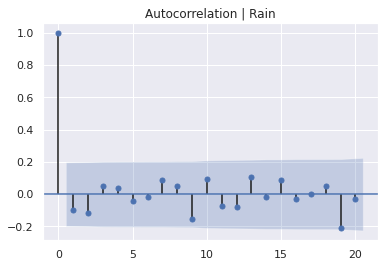

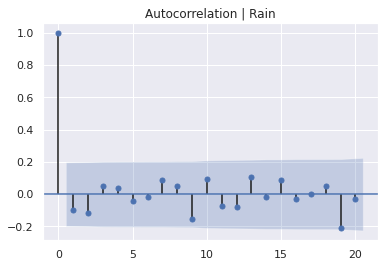

In [326]:
plot_acf(r, title='Autocorrelation | Rain')

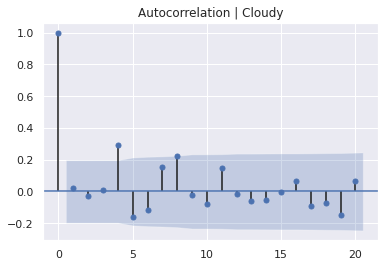

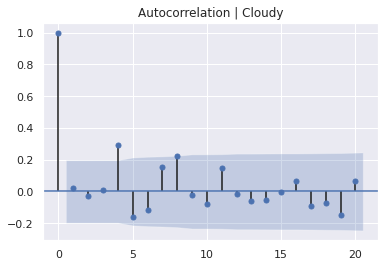

In [327]:
plot_acf(c, title='Autocorrelation | Cloudy')

#### **7. Implement burn-in and thinning-out for your sampler. (1 points)**


In [111]:
def gibbs_sampler_new(num_sample, burn_in, thinning):

  samples = {'cloudy': [],
            'rain': [], 
            'sprinkler': [], 
            'wet': []}

  # Conditional probability tables for each node
  conditional_probability = {'cloudy': np.array([0.5, 0.5]), 
                            'rain': np.array([[0.8, 0.2], [0.2, 0.8]]),  
                            'sprinkler': np.array([[0.5, 0.5], [0.9, 0.1]]), 
                            'wet': np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])}

  # Initialize the nodes
  cloudy = np.random.choice([0, 1], p=conditional_probability['cloudy'])
  rain = np.random.choice([0, 1], p=conditional_probability['rain'][cloudy])
  sprinkler = np.random.choice([0, 1], p=conditional_probability['sprinkler'][cloudy])
  wet = np.random.choice([0, 1], p=conditional_probability['wet'][sprinkler][rain])

  # Loop
  for _ in range(num_sample):
    cloudy = np.random.choice([0, 1], p=conditional_probability['cloudy'])
    rain = np.random.choice([0, 1], p=conditional_probability['rain'][cloudy])
    sprinkler = np.random.choice([0, 1], p=conditional_probability['sprinkler'][cloudy])
    wet = np.random.choice([0, 1], p=conditional_probability['wet'][sprinkler][rain])
    
    # Save the samples if burn-in and thinning conditions are met
    if _ > burn_in and (_-burn_in) % thinning == 0: 
      samples['cloudy'].append(cloudy)
      samples['rain'].append(rain)
      samples['sprinkler'].append(sprinkler)
      samples['wet'].append(wet)
  
  return samples

#### **8. Re-estimate P(R = T | S = T,W = T) based on 100 samples obtained after the suggested burn-in time and thinning-out. Compare with (3) and comment on your results. (1 point)**


In [116]:
samples3 = gibbs_sampler_new(100, 20, 2)

In [117]:
id = []
for i in range(len(samples3['cloudy'])):
  if samples3['sprinkler'][i] == 1 and samples3['wet'][i] == 1:
    id.append(i)

In [118]:
count = 0
for i in id:
  if samples3['rain'][i] == 1:
    count += 1
marginal_probability = count/len(id)
print(marginal_probability)

0.2727272727272727


In [115]:
count = 0
for i in id:
  if samples['rain'][i] == 1:
    count += 1
marginal_probability = count/len(id)
print(marginal_probability)

0.4


By discarding a certain number of initial samples (burn-in) and only considering every k-th sample (thinning-out), the algorithm is able to avoid the influence of initial conditions and correlation among samples. Therefore, the new probability of 0.27 is likely a more accurate estimate of the true probability, while the old probability of 0.40 was likely influenced by initial conditions and correlation.

#### **9. Compute the probability P(R = T | S = T,W = T) analytically and compare it to the sampling estimate. In real world applications, sampling is performed, because it is usually not possible to easily compute the probabilities analytically. However, since the Bayesian network in Figure 1 is only a small network with discrete variables, the analytical approach is possible. (2 points)**